In [2]:
#Example modified from http://cs231n.github.io/neural-networks-case-study/

#Imports 
import numpy as np #Represent ndarrays a.k.a. tensors
import matplotlib.pyplot as plt #For plotting
np.random.seed(0) #For repeatability of the experiment
import pickle #To read data for this experiment

#Setup
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

**Data**

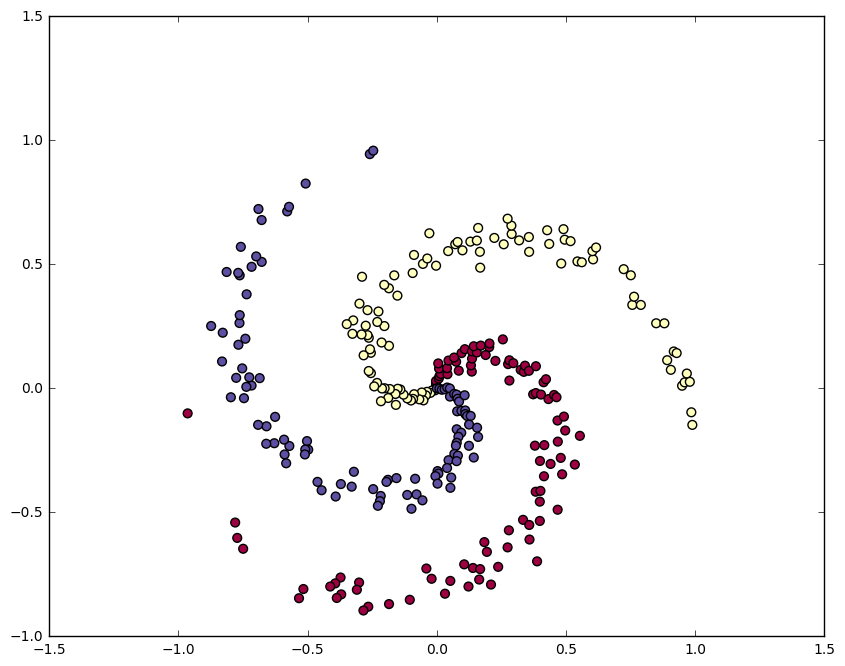

In [3]:

#Read data
X = pickle.load(open('dataX.pickle','rb'))
y = pickle.load(open('dataY.pickle','rb'))

#Define some local varaibles
D = X.shape[1] #Number of features
K = max(y)+1 #Number of classes assuming class index starts from 0

#Plot the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

**Model**

In [4]:
# Feedforward neural net model
# split data into 80-20
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)



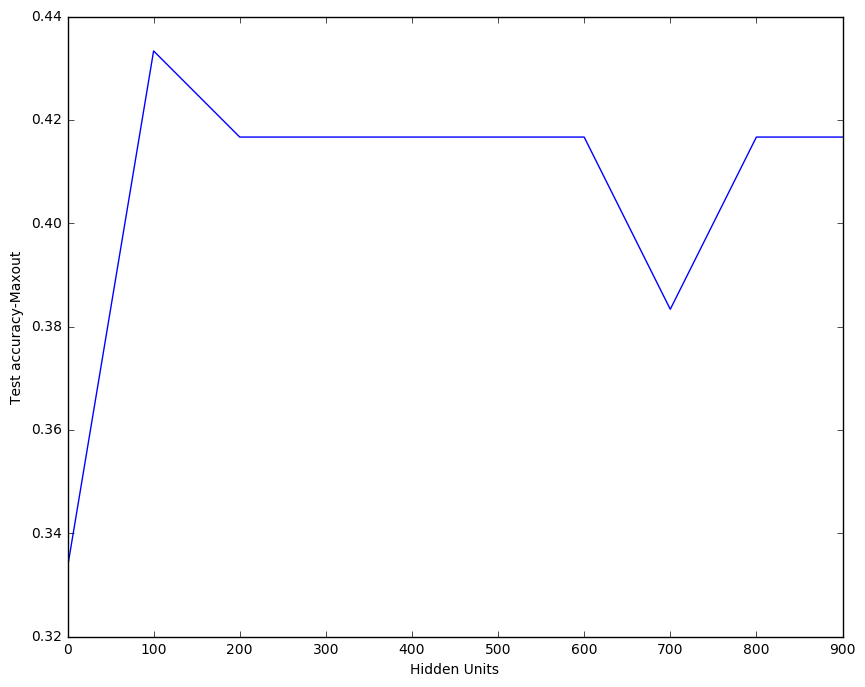

In [12]:
#using maxout non linearity

# Start with an initial set of parameters randomly
#h = 100 # size of hidden layer



# Initial values from hyperparameter
reg = 1e-1 # regularization strength

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-1 #Also called learning rate

tr_acc=[]
ts_acc=[]
h_arr=np.arange(0,1000,100)  
#(0.01,0.1,0.01)        (0.001,0.01,0.001)
for h in np.arange(0,1000,100)  :
    W1 = 0.01 * np.random.randn(D,h)
    b1 = np.zeros((1,h))
    W3 = 0.01 * np.random.randn(h,K)
    b3 = np.zeros((1,K))
    W2 =0.01 * np.random.randn(D,h)
    b2 = np.zeros((1,h))

# gradient descent loop
    for i in range(1000):

        # evaluate class scores, [N x K]
        hidden_layer = np.maximum((np.dot(X_train, W2) + b2), np.dot(X_train, W1) + b1) # note, ReLU activation
        scores = np.dot(hidden_layer, W3) + b3
           # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

          # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)+ 0.5*reg*np.sum(W3*W3)
        loss = data_loss + reg_loss
        #if i % 1000 == 0:
            #print ("iteration:",i, " loss:", loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples

          # backpropate the gradient to the parameters
          # first backprop into parameters W2 and b2
        dW3 = np.dot(hidden_layer.T, dscores)
        db3 = np.sum(dscores, axis=0, keepdims=True)
          # next backprop into hidden layer
        dhidden = np.dot(dscores, W3.T)



          # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] = 0
          # finally into W,b
        dW2 = np.dot(X_train.T, dhidden)
        db2 = np.sum(dhidden, axis=0, keepdims=True)
        dW1 = np.dot(X_train.T, dhidden)
        db1 = np.sum(dhidden, axis=0, keepdims=True)

          # add regularization gradient contribution
        dW3 += reg*W3
        dW2 += reg * W2
        dW1 += reg * W1
         # perform a parameter update
        W1 += -step_size * dW1
        b1 += -step_size * db1
        W2 += -step_size * dW2
        b2 += -step_size * db2
        W3 += -step_size * dW3
        b3 += -step_size * db3
        
    hidden_layer = np.maximum((np.dot(X_test, W2) + b2), np.dot(X_test, W1) + b1) # note, maxout activation
    scores = np.dot(hidden_layer, W3) + b3
    predicted_class = np.argmax(scores, axis=1)
    #print ("test accuracy: ",(np.mean(predicted_class == y_test)))
    ts_acc1=np.mean(predicted_class == y_test)
    ts_acc.append(ts_acc1)
    
    hidden_layer = np.maximum((np.dot(X_train, W2) + b2), np.dot(X_train, W1) + b1) # note, maxout activation
    scores = np.dot(hidden_layer, W3) + b3
    predicted_class = np.argmax(scores, axis=1)
    #print ("train accuracy: ",(np.mean(predicted_class == y_train)))
    tr_acc1=np.mean(predicted_class == y_train)
    tr_acc.append(tr_acc1)

    
plt.plot(h_arr,ts_acc)
plt.ylabel('Test accuracy-Maxout')
plt.xlabel('Hidden Units')
plt.show()

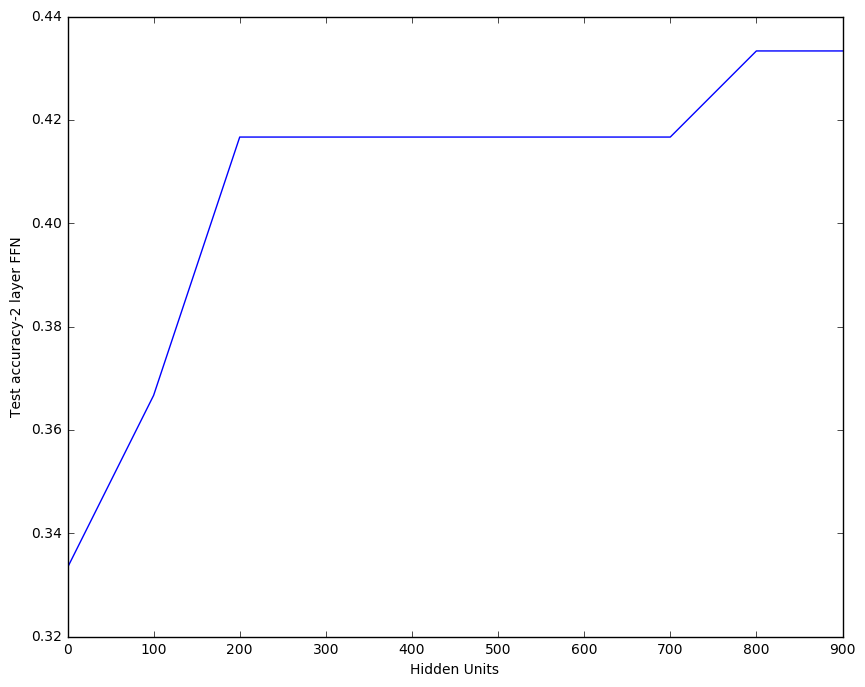

In [11]:
#using ReLU non linearity

#5.1 hidden units

# Start with an initial set of parameters randomly
#h = 100 # size of hidden layer



# Initial values from hyperparameter
reg = 1e-1 # regularization strength

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-1 #Also called learning rate

tr_acc=[]
ts_acc=[]
h_arr=np.arange(0,1000,100)  
#(0.01,0.1,0.01)        (0.001,0.01,0.001)
for h in np.arange(0,1000,100)  :
    W = 0.01 * np.random.randn(D,h)
    b = np.zeros((1,h))
    W2 = 0.01 * np.random.randn(h,K)
    b2 = np.zeros((1,K))

# gradient descent loop
    for i in range(1000):

        # evaluate class scores, [N x K]
        hidden_layer = np.maximum(0, np.dot(X_train, W) + b) # note, ReLU activation
        scores = np.dot(hidden_layer, W2) + b2
           # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

          # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        #if i % 1000 == 0:
            #print ("iteration:",i, " loss:", loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples

        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
          # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
          # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] = 0
          # finally into W,b
        dW = np.dot(X_train.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)

          # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

          # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
        
    hidden_layer = np.maximum(0, np.dot(X_test, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    #print ("test accuracy: ",(np.mean(predicted_class == y_test)))
    ts_acc1=np.mean(predicted_class == y_test)
    ts_acc.append(ts_acc1)
    
    hidden_layer = np.maximum(0, np.dot(X_train, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    #print ("train accuracy: ",(np.mean(predicted_class == y_train)))
    tr_acc1=np.mean(predicted_class == y_train)
    tr_acc.append(tr_acc1)

    
plt.plot(h_arr,ts_acc)
plt.ylabel('Test accuracy-2 layer FFN')
plt.xlabel('Hidden Units')
plt.show()

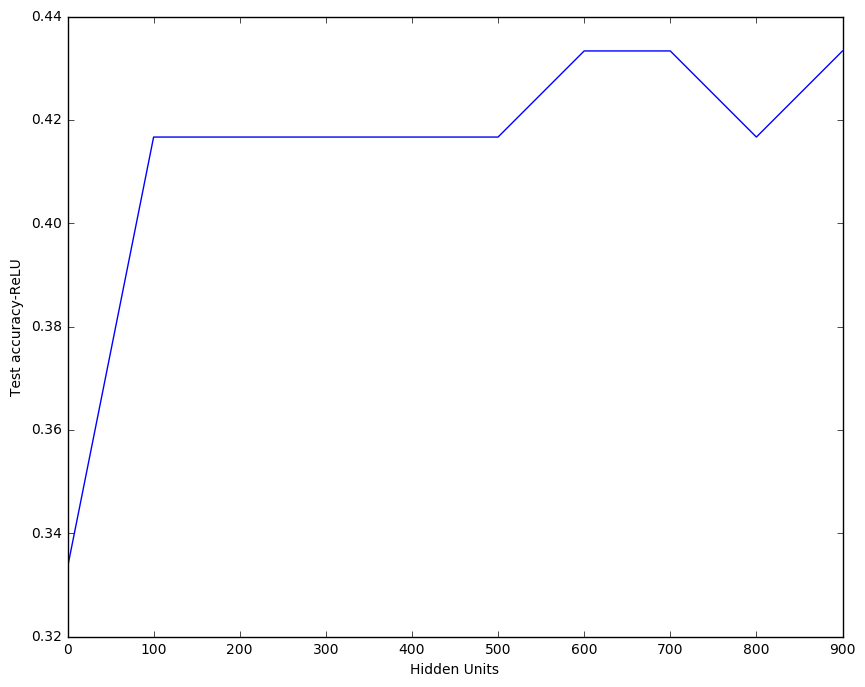

In [14]:
#using Leaky ReLU non linearity

# Start with an initial set of parameters randomly
#h = 100 # size of hidden layer

# Initial values from hyperparameter
reg = 1e-1 # regularization strength

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-1 #Also called learning rate

tr_acc=[]
ts_acc=[]
h_arr=np.arange(0,1000,100)  
#(0.01,0.1,0.01)        (0.001,0.01,0.001)
for h in np.arange(0,1000,100)  :
    W = 0.01 * np.random.randn(D,h)
    b = np.zeros((1,h))
    W2 = 0.01 * np.random.randn(h,K)
    b2 = np.zeros((1,K))


# gradient descent loop
    for i in range(1000):

        # evaluate class scores, [N x K]
        hidden_layer = np.maximum((np.dot(X_train, W) + b)*0.01, np.dot(X_train, W) + b) # note, ReLU activation
        scores = np.dot(hidden_layer, W2) + b2
           # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

          # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        #if i % 1000 == 0:
            #print ("iteration:",i, " loss:", loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples

          # backpropate the gradient to the parameters
          # first backprop into parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
          # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
          # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] = 0
          # finally into W,b
        dW = np.dot(X_train.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)

          # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

          # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
        

    hidden_layer = np.maximum(0, np.dot(X_test, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    #print ("test accuracy: ",(np.mean(predicted_class == y_test)))
    ts_acc1=np.mean(predicted_class == y_test)
    ts_acc.append(ts_acc1)
  

    hidden_layer = np.maximum(0, np.dot(X_train, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    #print ("train accuracy: ",(np.mean(predicted_class == y_train)))
    tr_acc1=np.mean(predicted_class == y_train)
    tr_acc.append(tr_acc1)

    
plt.plot(h_arr,ts_acc)
plt.ylabel('Test accuracy-ReLU')
plt.xlabel('Hidden Units')
plt.show()

**Post Training**

In [5]:
# Post-training: evaluate test set accuracy

#For simplicity, we will use training data as proxy for test. Do not do this.





test accuracy:  0.433333333333


train accuracy:  0.508333333333


In [7]:
# Post training: plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

NameError: name 'W' is not defined

In [ ]:
# Post training: plot the resulting classifier
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())